# Scipy

In [30]:
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

## Use LU decomposition to solve Ax=b

Create a random 5x5 matrix

In [31]:
n = 5
A = np.random.rand(n,n)
print(A)

[[0.81198911 0.7637774  0.68840874 0.60620369 0.8338482 ]
 [0.10537446 0.85007658 0.4833075  0.84139651 0.8072123 ]
 [0.46144003 0.83477392 0.39061446 0.3641788  0.70300426]
 [0.4294862  0.64540648 0.41767892 0.61545157 0.4887444 ]
 [0.87641012 0.0068326  0.89590749 0.41331757 0.65543761]]


Compute its LU factorization

In [32]:
lu,piv = la.lu_factor(A)

Create a right hand side vector

In [33]:
b = np.random.rand(n)

Solve A x = b

In [34]:
x = la.lu_solve((lu,piv),b)
print(x)

[-0.0051553   1.99314613  2.99364575 -0.28846102 -3.05192169]


Check that x solves the problem

In [35]:
print(A@x-b)

[-3.33066907e-16  1.11022302e-16  5.55111512e-16 -2.22044605e-16
 -2.22044605e-16]


If we do not want the LU decomposition, we can directly solve, which uses LAPACK 

In [36]:
y = la.solve(A,b)
print(y)

[-0.0051553   1.99314613  2.99364575 -0.28846102 -3.05192169]


## Sparse matrix

Scipy provides methods that can work on sparse matrices, see https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html

Sparse matrix formats are provided by

 * csc_matrix: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csc_matrix.html
 * csr_matrix: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
 
 csc_matrix stores the entries column-wise, csr_matrix stores them row-wise.

In [37]:
from scipy.sparse import csc_matrix, csr_matrix
A = csc_matrix([[3, 2, 0], [1, -1, 0], [0, 5, 1]], dtype=float)
print(A)
print(A.todense())

  (0, 0)	3.0
  (1, 0)	1.0
  (0, 1)	2.0
  (1, 1)	-1.0
  (2, 1)	5.0
  (2, 2)	1.0
[[ 3.  2.  0.]
 [ 1. -1.  0.]
 [ 0.  5.  1.]]


In [38]:
A = csr_matrix([[3, 2, 0], [1, -1, 0], [0, 5, 1]], dtype=float)
print(A)
print(A.todense())

  (0, 0)	3.0
  (0, 1)	2.0
  (1, 0)	1.0
  (1, 1)	-1.0
  (2, 1)	5.0
  (2, 2)	1.0
[[ 3.  2.  0.]
 [ 1. -1.  0.]
 [ 0.  5.  1.]]


We can construct sparse matrix by giving indices and values

In [39]:
row = np.array([0, 0, 1, 1, 2, 2])
col = np.array([0, 1, 0, 1, 1, 2])
data = np.array([3.0, 2.0, 1.0, -1.0, 5.0, 1.0])
A = csc_matrix((data, (row, col)), shape=(3, 3))
print(A.todense())

[[ 3.  2.  0.]
 [ 1. -1.  0.]
 [ 0.  5.  1.]]


## Curve fitting

Suppose we are given some data set $(x_i,y_i)$, $i=0,1,...,n-1$ and we suspect there is a linear relation ship between them
$$
y = a + b x
$$
But possibly the data also has some noise. Let us generate such a data set.

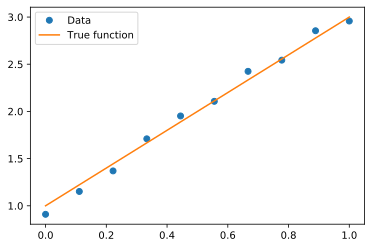

In [40]:
a = 1.0
b = 2.0
n = 10
x = np.linspace(0,1,n)
ye = a + b*x
# Add some noise
y = ye + 0.1*(2*np.random.rand(n)-1)
plt.plot(x,y,'o',x,ye)
plt.legend(('Data','True function'))

Define the function we want to fit. The first argument is the independent variable, and remaining are the parameters that we want to find.

In [41]:
def f(x,a,b):
    return a + b*x

We can use [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) function from scipy to do the fitting.

Fitted parameters =  0.9472034461228854 2.1014487952798944


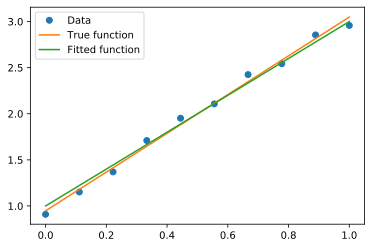

In [42]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(f, x, y)
print('Fitted parameters = ',*popt)
plt.plot(x,y,'o',x,f(x,*popt),x,ye)
plt.legend(('Data','True function','Fitted function'))